In [1]:
!pip install quandl
import quandl
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
from math import sqrt

In [0]:
quandl.ApiConfig.api_key = "Please Use Your Own Api Key from Quandl"

In [0]:
df = quandl.get("NSE/MRF", start_date="2013-01-01", end_date="2018-05-18")

In [4]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2013-01-01,12927.0,13380.00,12879.85,13350.0,13243.25,20619.0,2695.81
2013-01-02,13312.4,13435.00,13256.00,13295.0,13316.20,12217.0,1631.71
2013-01-03,13351.0,13365.95,13124.15,13273.0,13279.10,10213.0,1353.29
2013-01-04,13240.0,13418.40,13221.30,13365.0,13361.10,7307.0,973.81
2013-01-07,13375.0,13439.95,13265.00,13295.0,13288.80,7509.0,1001.57


In [5]:
df.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-05-14,74750.0,75152.70,74515.45,74950.00,74737.35,3327.0,2490.00
2018-05-15,74850.0,75599.00,74341.65,74500.00,74604.95,4574.0,3422.04
2018-05-16,74500.0,75098.85,73978.05,74760.90,74873.40,7566.0,5659.91
2018-05-17,74803.4,75276.95,74400.00,74569.85,74559.95,4063.0,3034.76
2018-05-18,74555.0,75509.00,73925.10,74200.00,74206.20,5414.0,4034.38


In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
df.drop(df.columns[[3,5,6]], axis=1, inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2013-01-01,12927.0,13380.00,12879.85,13243.25
2013-01-02,13312.4,13435.00,13256.00,13316.20
2013-01-03,13351.0,13365.95,13124.15,13279.10
2013-01-04,13240.0,13418.40,13221.30,13361.10
2013-01-07,13375.0,13439.95,13265.00,13288.80


In [8]:
df['High'] = df['High'] / 100000
df['Open'] = df['Open'] / 100000
df['Low'] = df['Low'] / 100000
df['Close'] = df['Close'] / 100000
print(df.head())
print(df.tail())

                Open      High       Low     Close
Date                                              
2013-01-01  0.129270  0.133800  0.128799  0.132433
2013-01-02  0.133124  0.134350  0.132560  0.133162
2013-01-03  0.133510  0.133660  0.131241  0.132791
2013-01-04  0.132400  0.134184  0.132213  0.133611
2013-01-07  0.133750  0.134400  0.132650  0.132888
                Open      High       Low     Close
Date                                              
2018-05-14  0.747500  0.751527  0.745154  0.747374
2018-05-15  0.748500  0.755990  0.743416  0.746049
2018-05-16  0.745000  0.750989  0.739781  0.748734
2018-05-17  0.748034  0.752769  0.744000  0.745599
2018-05-18  0.745550  0.755090  0.739251  0.742062


In [0]:
data = df.to_numpy()

In [12]:
data

array([[0.12927  , 0.1338   , 0.1287985, 0.1324325],
       [0.133124 , 0.13435  , 0.13256  , 0.133162 ],
       [0.13351  , 0.1336595, 0.1312415, 0.132791 ],
       ...,
       [0.745    , 0.7509885, 0.7397805, 0.748734 ],
       [0.748034 , 0.7527695, 0.744    , 0.7455995],
       [0.74555  , 0.75509  , 0.739251 , 0.742062 ]])

In [13]:
result = []
sequence_length = 6
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
    
result = np.array(result)

row = round(0.8 * result.shape[0])

#creating training data
train = result[:int(row), :]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]

amount_of_features = len(df.columns)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features)) 

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (1060, 5, 4)
y_train (1060,)
X_test (265, 5, 4)
y_test (265,)


In [14]:
import math
#importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D ,MaxPooling1D
from keras.layers.recurrent import LSTM
from keras import losses

Using TensorFlow backend.


In [0]:
from keras import optimizers
def build_model(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(LSTM(32, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
        #model.add(Dropout(d))
        model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
        model.compile(loss='mse',optimizer='adam',metrics=['mae'])
        return model

In [16]:
model = build_model([4,5,1])
#Summary of the Model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 128)            68096     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 89,249
Trainable params: 89,249
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=25,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Train on 848 samples, validate on 212 samples
Epoch 1/25
 - 1s - loss: 0.0834 - mae: 0.2690 - val_loss: 0.2184 - val_mae: 0.4594
Epoch 2/25
 - 0s - loss: 0.0758 - mae: 0.2549 - val_loss: 0.1948 - val_mae: 0.4334
Epoch 3/25
 - 0s - loss: 0.0593 - mae: 0.2225 - val_loss: 0.1321 - val_mae: 0.3552
Epoch 4/25
 - 0s - loss: 0.0236 - mae: 0.1256 - val_loss: 0.0256 - val_mae: 0.1440
Epoch 5/25
 - 0s - loss: 0.0107 - mae: 0.0870 - val_loss: 0.0108 - val_mae: 0.0884
Epoch 6/25
 - 0s - loss: 0.0065 - mae: 0.0681 - val_loss: 0.0392 - val_mae: 0.1847
Epoch 7/25
 - 0s - loss: 0.0068 - mae: 0.0691 - val_loss: 0.0345 - val_mae: 0.1724
Epoch 8/25
 - 0s - loss: 0.0046 - mae: 0.0593 - val_loss: 0.0151 - val_mae: 0.1054
Epoch 9/25
 - 0s - loss: 0.0038 - mae: 0.0536 - val_loss: 0.0141 - val_mae: 0.1032
Epoch 10/25
 - 0s - loss: 0.0024 - mae: 0.0421 - val_loss: 0.0135 - val_mae: 0.1042
Epoch 11/25
 - 0s - loss: 0.0016 - mae: 0.0333 - val_loss: 0.0055 - val_mae: 0.0616
Epoch 12/25
 - 0s - loss: 9.6340e-04 - 

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

In [0]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

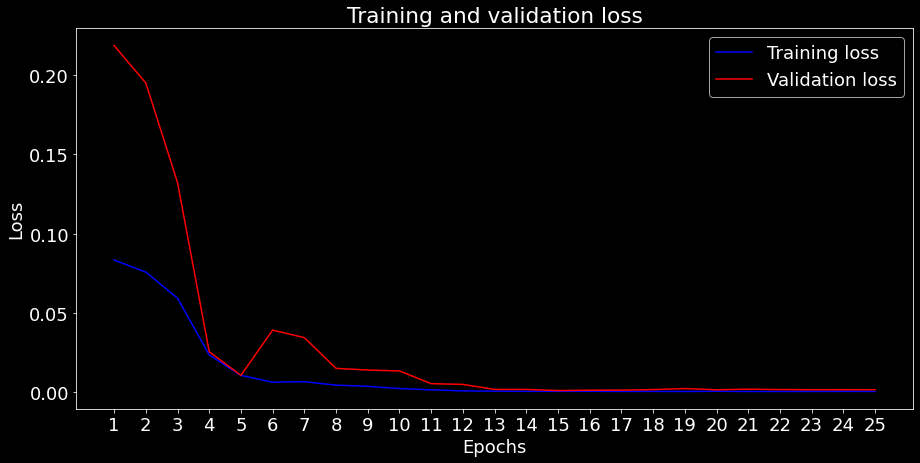

In [35]:


import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/25/mrftest&validationlossconv1dlstm.png', dpi=300)
plt.show()

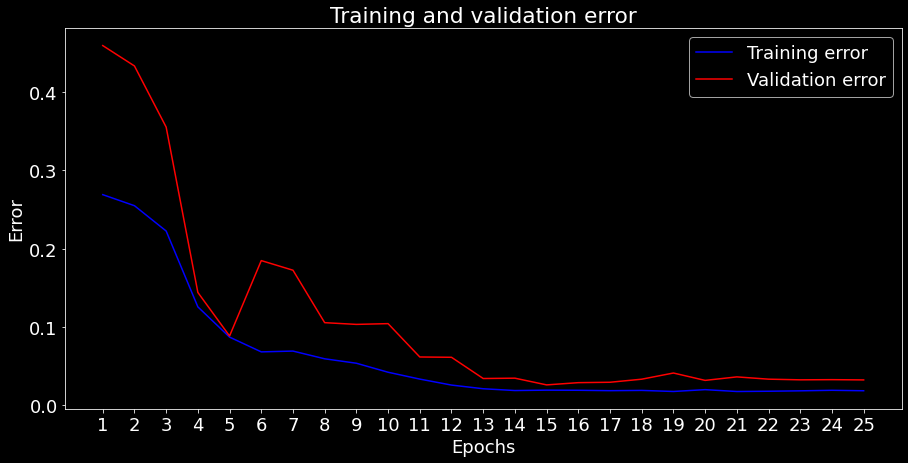

In [36]:
mae = history_dict['mae']
vmae = history_dict['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/25/mrftest&validationerrorconv1dlstm.png', dpi=300)
plt.show()

In [37]:
model.metrics_names

['loss', 'mae']

In [0]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [0]:
#predicting values for y_test
p = model.predict(x_test)

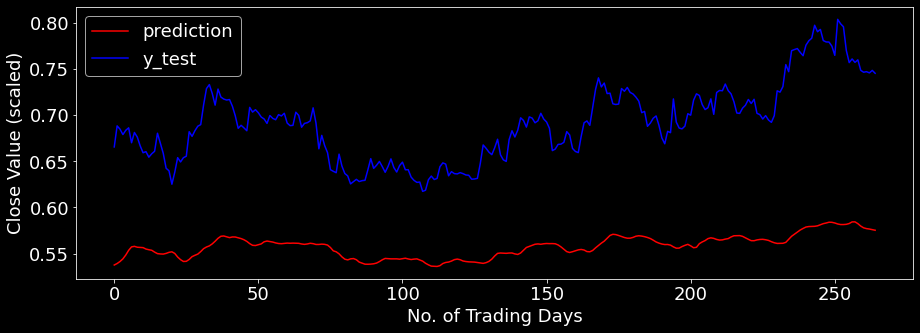

In [40]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/25/mrftestconv1dlstm.png', dpi=300)
plt.show()

In [0]:
p1= model.predict(x_train)

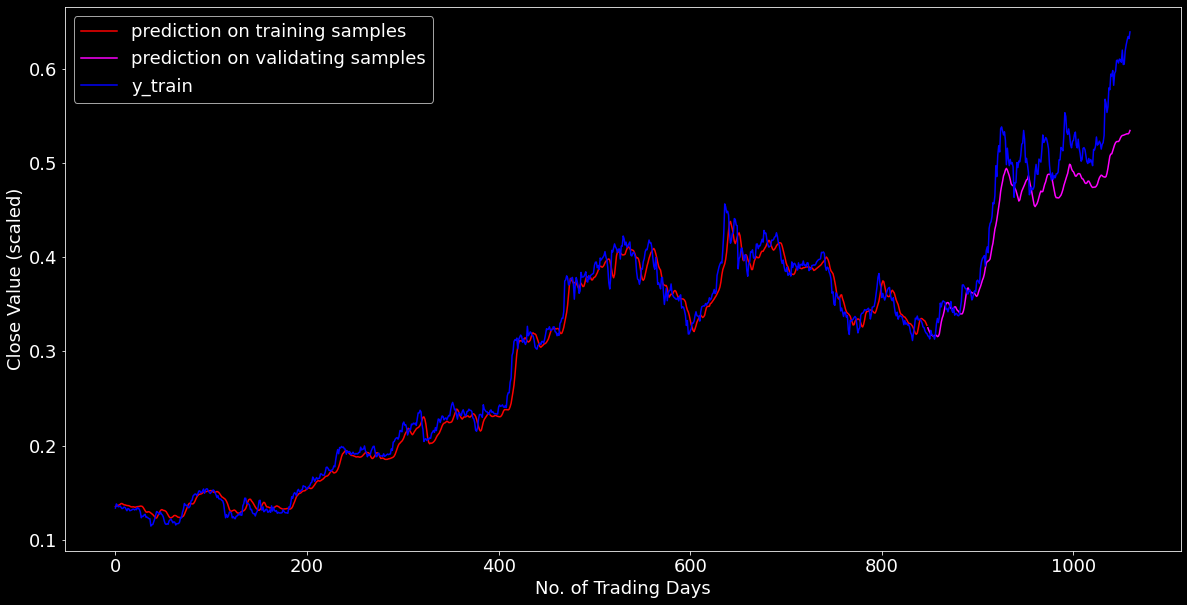

In [42]:
plt.plot(p1[:848],color='red', label='prediction on training samples')
x = np.array(range(848,1060))
plt.plot(x,p1[848:],color = 'magenta',label ='prediction on validating samples')
plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/25/mrftrainconv1dlstm.png', dpi=300)
plt.show()

In [0]:
y = y_test * 100000
y_pred = p.reshape(265)
y_pred = y_pred * 100000

In [0]:
from sklearn.metrics import mean_absolute_error

In [45]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.021018439 		 0.013121792 		 0.137065085 		 0.133352339


In [46]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 13335.234415017 			 19.095735832


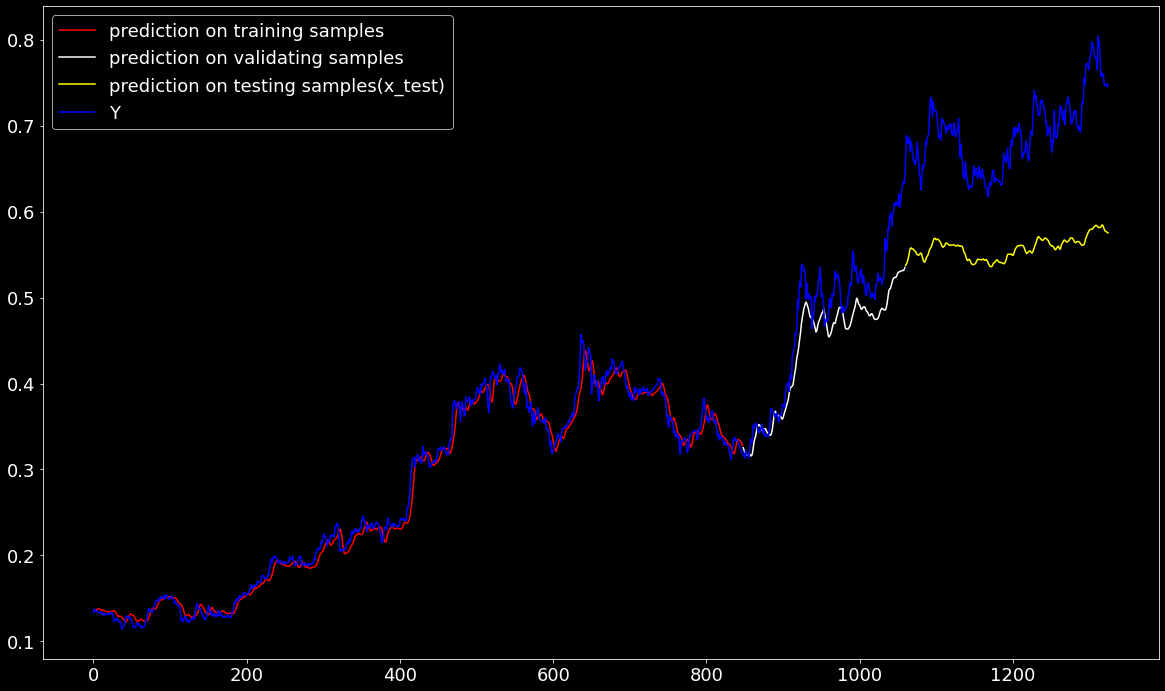

In [51]:
Y = np.concatenate((y_train,y_test),axis = 0)
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:848],color='red', label='prediction on training samples')
#for validating samples
z = np.array(range(848,1060))
plt.plot(z,P[848:1060],color = 'white',label ='prediction on validating samples')
#for testing samples
x = np.array(range(1060,1325))
plt.plot(x,P[1060:],color = 'yellow',label ='prediction on testing samples(x_test)')

plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()